In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linreg
import numpy as np
import json

Opening file for:
sea level, co2 emission, temperature and percipitations and store them per decades:
Temperature: t_1: 1992-2001; t_2: 2002-2011; t_3: 2012-2021;
Percipitations: p_1: 1992-2001; p_2: 2002-2011; p_3: 2012-2021;
CO_2: c_1: 1992-2001; c_2: 2002-2011; c_3: 2012-2021;
Sea Level: s_1: 1992-2001; s_2: 2002-2011; s_3: 2012-2021; 

In [64]:
f = open('seaLevelData.js', encoding='utf-8')
sea=json.load(f)
print(sea)

[{'Year': 1993, 'CSIRO - Adjusted sea level (inches)': 6.3031496, 'CSIRO - Lower error bound (inches)': 6.04330708, 'CSIRO - Upper error bound (inches)': 6.562992119, 'NOAA - Adjusted sea level (inches)': 6.306781039}, {'Year': 1994, 'CSIRO - Adjusted sea level (inches)': 6.507874009, 'CSIRO - Lower error bound (inches)': 6.24803149, 'CSIRO - Upper error bound (inches)': 6.767716529, 'NOAA - Adjusted sea level (inches)': 6.438651665}, {'Year': 1995, 'CSIRO - Adjusted sea level (inches)': 6.622047237, 'CSIRO - Lower error bound (inches)': 6.362204718, 'CSIRO - Upper error bound (inches)': 6.881889757, 'NOAA - Adjusted sea level (inches)': 6.57674495}, {'Year': 1996, 'CSIRO - Adjusted sea level (inches)': 6.78346456, 'CSIRO - Lower error bound (inches)': 6.523622041, 'CSIRO - Upper error bound (inches)': 7.043307079, 'NOAA - Adjusted sea level (inches)': 6.723710173}, {'Year': 1997, 'CSIRO - Adjusted sea level (inches)': 7.059055111, 'CSIRO - Lower error bound (inches)': 6.799212591, 'CS

In [65]:
sea=pd.DataFrame(sea)
sea.head()


,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
0,1993,6.30315,6.043307,6.562992,6.306781
1,1994,6.507874,6.248031,6.767717,6.438652
2,1995,6.622047,6.362205,6.88189,6.576745
3,1996,6.783465,6.523622,7.043307,6.723710
4,1997,7.059055,6.799213,7.318898,6.779515


In [66]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 29 non-null     int64  
 1   CSIRO - Adjusted sea level (inches)  29 non-null     object 
 2   CSIRO - Lower error bound (inches)   29 non-null     object 
 3   CSIRO - Upper error bound (inches)   29 non-null     object 
 4   NOAA - Adjusted sea level (inches)   29 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [67]:
p_year = pd.read_csv('Percipitation_Readings.csv')
t_year = pd.read_csv('Temperature_Readings.csv')
c_year=pd.read_csv('Final_CO2.csv')
c_year.head()


,Reading_id,Country,Reading_date,CO2_emission
0,1,Afghanistan,1991,1.914
1,2,Afghanistan,1992,1.482
2,3,Afghanistan,1993,1.487
3,4,Afghanistan,1994,1.454
4,5,Afghanistan,1995,1.417


In [68]:
t_year.head()

,Reading_id,Station_id,Reading_date,Reading_value
0,98001,GHCND:AG000060390,1992-01-01 00:00:00,17.33
1,98002,GHCND:AG000060590,1992-01-01 00:00:00,21.10
2,98003,GHCND:AG000060611,1992-01-01 00:00:00,21.45
3,98004,GHCND:AG000060680,1992-01-01 00:00:00,20.95
4,98005,GHCND:AJ000037989,1992-01-01 00:00:00,14.27


In [69]:
c_1=c_year.loc[(c_year['Reading_date']>=1992)&(c_year['Reading_date']<2002),:]
c_2=c_year.loc[(c_year['Reading_date']>=2002)&(c_year['Reading_date']<2012),:]
c_3=c_year.loc[(c_year['Reading_date']>=2012)&(c_year['Reading_date']<2022),:]
c_3.head()

,Reading_id,Country,Reading_date,CO2_emission
21,22,Afghanistan,2012,10.035
22,23,Afghanistan,2013,9.251
23,24,Afghanistan,2014,9.170
24,25,Afghanistan,2015,9.791
25,26,Afghanistan,2016,9.068


In [70]:
t_year.head()


,Reading_id,Station_id,Reading_date,Reading_value
0,98001,GHCND:AG000060390,1992-01-01 00:00:00,17.33
1,98002,GHCND:AG000060590,1992-01-01 00:00:00,21.10
2,98003,GHCND:AG000060611,1992-01-01 00:00:00,21.45
3,98004,GHCND:AG000060680,1992-01-01 00:00:00,20.95
4,98005,GHCND:AJ000037989,1992-01-01 00:00:00,14.27


In [71]:
p_1=p_year.loc[(p_year['Reading_date']>='1992-01-01')&(p_year['Reading_date']<'2002-01-01'),:]
t_1=t_year.loc[(t_year['Reading_date']>='1992-01-01')&(t_year['Reading_date']<'2002-01-01'),:]
p_2=p_year.loc[(p_year['Reading_date']>='2002-01-01')&(p_year['Reading_date']<'2012-01-01'),:]
t_2=t_year.loc[(t_year['Reading_date']>='2002-01-01')&(t_year['Reading_date']<'2012-01-01'),:]
p_3=p_year.loc[(p_year['Reading_date']>='2012-01-01')&(p_year['Reading_date']<'2022-01-01'),:]
t_3=t_year.loc[(t_year['Reading_date']>='2012-01-01')&(t_year['Reading_date']<'2022-01-01'),:]

t_3.head()

,Reading_id,Station_id,Reading_date,Reading_value
204751,302752,GHCND:AGE00147716,2012-01-01 00:00:00,18.50
204752,302753,GHCND:AGM00060444,2012-01-01 00:00:00,16.81
204753,302754,GHCND:AGM00060518,2012-01-01 00:00:00,19.24
204754,302755,GHCND:AGM00060522,2012-01-01 00:00:00,17.92
204755,302756,GHCND:AGM00060535,2012-01-01 00:00:00,15.19


In [72]:
#p_1n=p_1.loc[(pr_1_adj['Value']<8000)]['Value'].values.tolist()
#p_2n=p_2['Value'].values.tolist()
#p_3n=p_3['Value'].values.tolist()

#print(pr_1n)


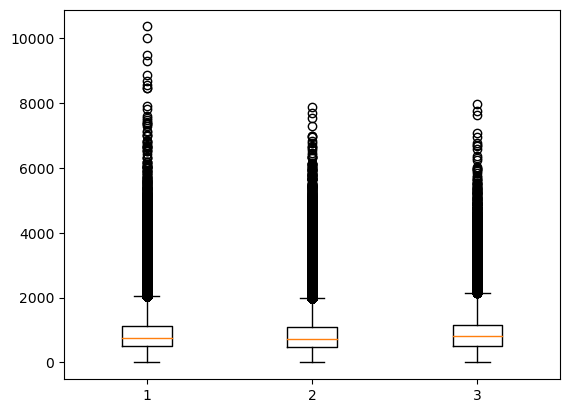

In [73]:
from matplotlib import pyplot as plt

data=[p_1.loc[(p_1['Reading_value']<12000)]['Reading_value'], p_2['Reading_value'], p_3['Reading_value']]

plt.boxplot(data)

plt.show()

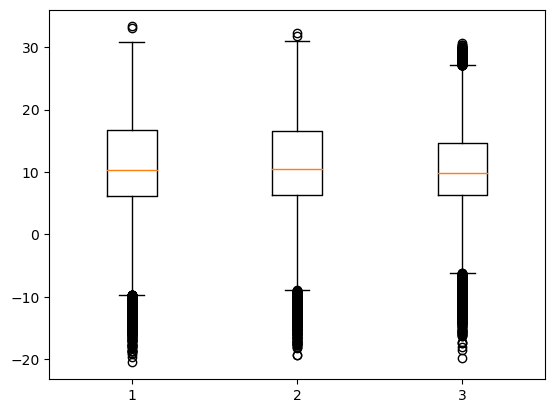

In [74]:
from matplotlib import pyplot as plt

data=[t_1.loc[(t_1['Reading_value']>-40)]['Reading_value'], t_2['Reading_value'], t_3['Reading_value']]

plt.boxplot(data)

plt.show()

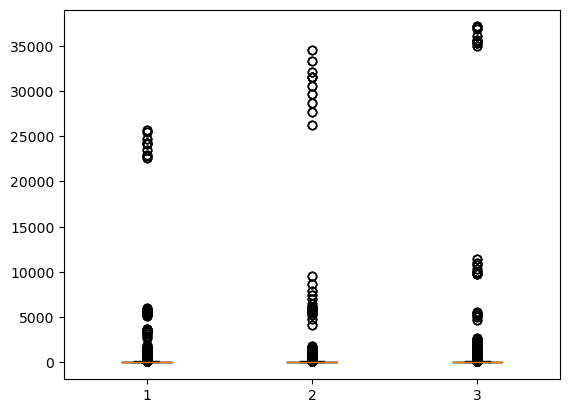

In [75]:
from matplotlib import pyplot as plt

data=[c_1.loc[(c_1['CO2_emission']>-40)]['CO2_emission'], c_2['CO2_emission'], c_3['CO2_emission']]

plt.boxplot(data)

plt.show()

<AxesSubplot:ylabel='Density'>

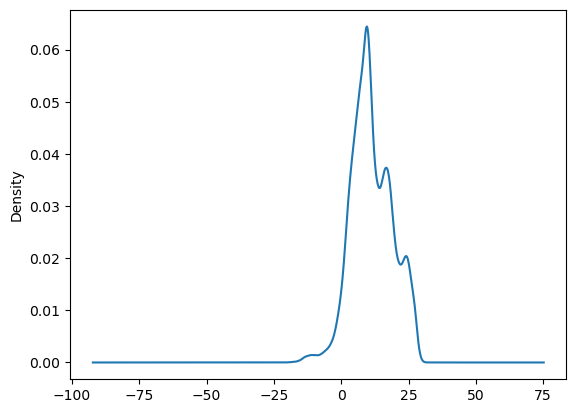

In [76]:
t_1['Reading_value'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

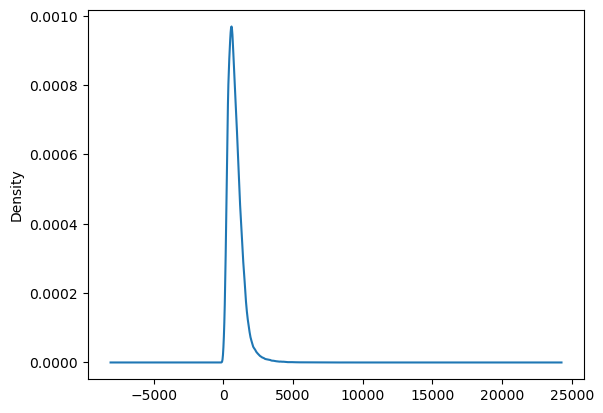

In [77]:
p_1['Reading_value'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

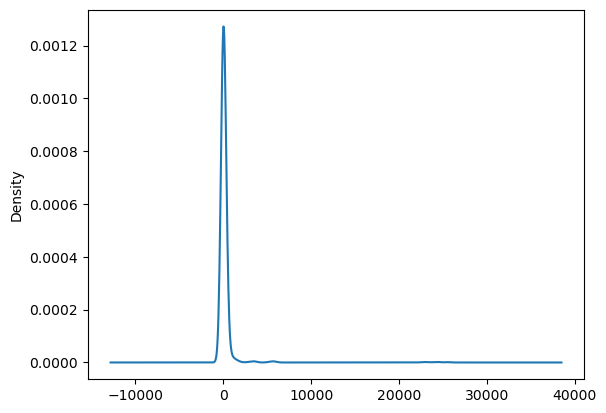

In [78]:
c_1['CO2_emission'].plot(kind='kde')

Build a density function


Information about max and min values for last three decades: in info file 

In [79]:
info=[{'1992-2001(min-max)': [t_1['Reading_value'].min(), t_1['Reading_value'].max()],
        '2002-2011(min-max)': [t_2['Reading_value'].min(), t_2['Reading_value'].max()],
        '2012-2021(min-max)': [t_3['Reading_value'].min(), t_3['Reading_value'].max()]},
        {'1992-2001(min-max)': [p_1['Reading_value'].min(),p_1['Reading_value'].max()],
        '2002-2011(min-max)': [p_2['Reading_value'].min(), p_2['Reading_value'].max()],
        '2012-2021(min-max)': [p_3['Reading_value'].min(), p_3['Reading_value'].max()]},
        {'1992-2001(min-max)': [c_1['CO2_emission'].max(), c_1['CO2_emission'].min()],
        '2002-2011(min-max)': [c_2['CO2_emission'].max(), c_2['CO2_emission'].min()],
        '2012-2021(min-max)': [c_3['CO2_emission'].max(), c_3['CO2_emission'].min()]}]

info_df = pd.DataFrame(info, index=['Temperature (C)', 'Percipitations (mm)', 'CO_2 (ppm)'])

info_df.head()


,1992-2001(min-max),2002-2011(min-max),2012-2021(min-max)
Temperature (C),"[-50.41, 33.33]","[-19.39, 32.32]","[-19.86, 30.69]"
Percipitations (mm),"[0.0, 16173.0]","[0.0, 7870.4]","[0.0, 7976.4]"
CO_2 (ppm),"[25668.049, 0.0]","[34487.012, 0.004]","[37123.852, 0.007]"


In [80]:
info_df.to_csv('info.csv', index=False)

In [81]:
info=info_df.to_json('info.json', orient='split')

Frequency distributions for temperature t_fr, precipitations p_fr and CO_2 level c_fr for last three decades: 1: 1992-2001, 2: 2002-2011, 3: 2011-2012

In [82]:
t_fr1=[]
t_fr2=[]
t_fr3=[]

for i in range(0,100):
    a=-20+0.54*i
    b=-19.46+0.54*i
    t_fr1.append(t_1.loc[(t_1['Reading_value']>=a)&(t_1['Reading_value']<b)]['Reading_value'].count())
    t_fr2.append(t_2.loc[(t_2['Reading_value']>=a)&(t_2['Reading_value']<b)]['Reading_value'].count())
    t_fr3.append(t_3.loc[(t_3['Reading_value']>=a)&(t_3['Reading_value']<b)]['Reading_value'].count())
print(t_fr1)


[1, 2, 5, 5, 6, 8, 7, 15, 27, 22, 38, 60, 64, 64, 59, 92, 76, 71, 82, 73, 75, 63, 75, 94, 85, 131, 124, 133, 150, 192, 194, 257, 273, 381, 436, 550, 658, 755, 922, 1159, 1388, 1602, 1806, 1969, 2156, 2164, 2408, 2537, 2635, 2762, 2949, 2938, 3153, 3341, 3711, 3608, 3195, 2833, 2423, 2101, 1915, 1881, 1772, 1696, 1795, 1856, 2045, 2004, 2081, 1992, 1862, 1741, 1424, 1305, 1139, 1055, 1011, 1019, 940, 1061, 1046, 1151, 1124, 1090, 901, 774, 725, 653, 477, 216, 105, 37, 12, 3, 1, 0, 0, 0, 2, 0]


In [83]:
c_fr1=[]
c_fr2=[]
c_fr3=[]

for i in range(0,7000,70):
    a=i
    b=i+70
    c_fr1.append(c_1.loc[(c_1['CO2_emission']>=a)&(c_1['CO2_emission']<b)]['CO2_emission'].count())
    c_fr2.append(c_2.loc[(c_2['CO2_emission']>=a)&(c_2['CO2_emission']<b)]['CO2_emission'].count())
    c_fr3.append(c_3.loc[(c_3['CO2_emission']>=a)&(c_3['CO2_emission']<b)]['CO2_emission'].count())
print(c_fr3)


[5130, 389, 189, 189, 141, 87, 117, 42, 63, 57, 18, 18, 0, 0, 3, 6, 6, 6, 9, 0, 0, 0, 0, 18, 9, 3, 0, 0, 3, 3, 0, 3, 3, 0, 9, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 6, 9, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [84]:
p_fr1=[]
p_fr2=[]
p_fr3=[]

for i in range(0,2500, 25):
    a=i
    b=i+25
    p_fr1.append(p_1.loc[(p_1['Reading_value']>=a)&(p_1['Reading_value']<b)]['Reading_value'].count())
    p_fr2.append(p_2.loc[(p_2['Reading_value']>=a)&(p_2['Reading_value']<b)]['Reading_value'].count())
    p_fr3.append(p_3.loc[(p_3['Reading_value']>=a)&(p_3['Reading_value']<b)]['Reading_value'].count())
print(p_fr1)


[350, 313, 464, 656, 862, 1174, 1528, 1900, 2144, 2677, 3083, 3474, 3839, 4221, 4430, 4489, 4637, 4731, 4854, 5001, 5059, 5204, 5276, 5283, 5260, 5097, 5128, 4992, 4819, 4576, 4601, 4508, 4342, 4239, 4097, 3985, 3901, 3818, 3637, 3613, 3326, 3275, 3210, 3028, 2902, 2694, 2646, 2467, 2330, 2381, 2230, 2106, 1960, 1889, 1812, 1640, 1598, 1519, 1476, 1401, 1330, 1246, 1129, 1051, 947, 926, 806, 835, 726, 680, 612, 636, 592, 530, 491, 468, 432, 430, 333, 345, 337, 346, 320, 274, 259, 228, 221, 239, 216, 209, 199, 228, 177, 160, 182, 134, 160, 153, 140, 121]


Creating json files for plotly graph in js

In [85]:
# for temperature

from numpy import False_


data_temp=[{'decade':[], 'temp':[], 'freq':[]},
            {'decade':[], 'temp':[], 'freq':[]}, 
            {'decade':[], 'temp':[], 'freq':[]}]
for i in range(0,100):
    data_temp[0]['decade'].append([2, 3])
    data_temp[0]['temp'].append([-20+0.54*i, -20+0.54*i])
    data_temp[0]['freq'].append([t_fr1[i],t_fr1[i]])
    data_temp[1]['decade'].append([5, 6])
    data_temp[1]['temp'].append([-20+0.54*i,-20+0.54*i])
    data_temp[1]['freq'].append([t_fr2[i],t_fr2[i]])
    data_temp[2]['decade'].append([8, 9])
    data_temp[2]['temp'].append([-20+0.54*i, -20+0.54*i])
    data_temp[2]['freq'].append([t_fr3[i],t_fr3[i]])
#print(data)

In [86]:
# for percipitations

data_perp=[{'decade':[], 'percip':[], 'freq':[]},
            {'decade':[], 'percip':[], 'freq':[]}, 
            {'decade':[], 'percip':[], 'freq':[]}]
for i in range(0,100):
    data_perp[0]['decade'].append([2, 3])
    data_perp[0]['percip'].append([25*(i+1), 25*(i+1)])
    data_perp[0]['freq'].append([p_fr1[i],p_fr1[i]])
    data_perp[1]['decade'].append([5, 6])
    data_perp[1]['percip'].append([25*(i+1), 25*(i+1)])
    data_perp[1]['freq'].append([p_fr2[i],p_fr2[i]])
    data_perp[2]['decade'].append([8, 9])
    data_perp[2]['percip'].append([25*(i+1), 25*(i+1)])
    data_perp[2]['freq'].append([p_fr3[i],p_fr3[i]])
#print(data)

In [87]:
# for CO_2

data_co=[{'decade':[], 'co_2':[], 'freq':[]},
        {'decade':[], 'co_2':[], 'freq':[]}, 
        {'decade':[], 'co_2':[], 'freq':[]}]
for i in range(0,100):
    data_co[0]['decade'].append([2, 3])
    data_co[0]['co_2'].append([70*(i+1), 70*(i+1)])
    data_co[0]['freq'].append([c_fr1[i], c_fr1[i]])
    data_co[1]['decade'].append([5, 6])
    data_co[1]['co_2'].append([70*(i+1), 70*(i+1)])
    data_co[1]['freq'].append([c_fr2[i], c_fr2[i]])
    data_co[2]['decade'].append([8, 9])
    data_co[2]['co_2'].append([70*(i+1), 70*(i+1)])
    data_co[2]['freq'].append([c_fr3[i], c_fr3[i]])
#print(data)

In [88]:
data_temp.append(data_perp[0])
data_temp.append(data_perp[1])
data_temp.append(data_perp[2])
data_temp.append(data_co[0])
data_temp.append(data_co[1])
data_temp.append(data_co[2])

In [89]:
class NumpyEncoder(json.JSONEncoder):
    """ Custom encoder for numpy data types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):

            return int(obj)

        elif isinstance(obj, (np.float_, np.float16, np.float32, np.float64)):
            return float(obj)

        elif isinstance(obj, (np.complex_, np.complex64, np.complex128)):
            return {'real': obj.real, 'imag': obj.imag}

        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()

        elif isinstance(obj, (np.bool_)):
            return bool(obj)

        elif isinstance(obj, (np.void)): 
            return None

        return json.JSONEncoder.default(self, obj)

In [90]:
f = open('data_temp.txt', 'w')
f.write(json.dumps(data_temp,cls=NumpyEncoder))
f.close()